In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../..')
from gp2 import Runner
import omama as O

In [3]:
R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmpt1gbigreGP2
Verbose mode active!


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Flower_dataset/102Flower_segmentation_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Flower_dataset/102Flower_segmentation_masks.npy')

In [5]:
len(masks)

8189

In [6]:
len(images)

8189

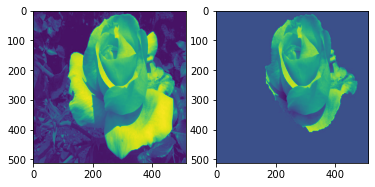

In [7]:
O.DataToNpyFiles.show_image_and_mask(images[222], masks[222])

In [8]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [9]:
#
#
R.setup_data(images, masks, dataset_size=8189, weights=weights)

Weights OK!


In [10]:
RUNS = 5

In [ ]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Epoch 1/100
7/7 [==============================] - 31s 3s/step - loss: -33.1270 - dice_coeff: 1.1678 - val_loss: -206.3212 - val_dice_coeff: 1.6877
Epoch 2/100
7/7 [==============================] - 9s 1s/step - loss: -54.3129 - dice_coeff: 1.2608 - val_loss: -153.6217 - val_dice_coeff: 1.5990
Epoch 3/100
7/7 [==============================] - 9s 1s/step - loss: -62.0789 - dice_coeff: 1.2954 - val_loss: -128.6554 - val_dice_coeff: 1.5383
Epoch 4/100
7/7 [==============================] - 9s 1s/step - loss: -66.5940 - dice_coeff: 1.3233 - val_loss: -123.2284 - val_dice_coeff: 1.5182
Epoch 5/100
7/7 [==============================] - 9s 1s/step - loss: -71.7737 - dice_coeff: 1.3431 - val_loss: -114.5797 - val_dice_coeff: 1.4910
Epoch 6/100
7/7 [==============================] - 9s 1s/step - loss: -76.0945 - dice_coeff: 1.3703 - val_loss: -110.9170 - val_dice_coeff: 1.4756
Epoch 7/100
7/7 [==============================] - 9s 1s/step - loss: -81.3918 - dice_coeff: 1.3877 - val_

Epoch 56/100
7/7 [==============================] - 10s 2s/step - loss: -149.1023 - dice_coeff: 1.4865 - val_loss: -246.7470 - val_dice_coeff: 1.5645
Epoch 57/100
7/7 [==============================] - 10s 1s/step - loss: -152.6798 - dice_coeff: 1.4944 - val_loss: -179.4575 - val_dice_coeff: 1.4687
Epoch 58/100
7/7 [==============================] - 10s 1s/step - loss: -153.6627 - dice_coeff: 1.4956 - val_loss: -227.7117 - val_dice_coeff: 1.5258
Epoch 59/100
7/7 [==============================] - 10s 2s/step - loss: -154.3317 - dice_coeff: 1.4954 - val_loss: -240.5063 - val_dice_coeff: 1.5447
Epoch 60/100
7/7 [==============================] - 10s 1s/step - loss: -154.5305 - dice_coeff: 1.4904 - val_loss: -236.1646 - val_dice_coeff: 1.5403
Epoch 61/100
7/7 [==============================] - 10s 1s/step - loss: -154.2703 - dice_coeff: 1.4985 - val_loss: -273.5168 - val_dice_coeff: 1.5883
Epoch 62/100
7/7 [==============================] - 10s 1s/step - loss: -156.1022 - dice_coeff: 1.49

In [ ]:
R.classifier_scores

In [ ]:
R.discriminator_scores

In [ ]:
R.plot()